In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor

In [110]:
aqi = pd.read_csv('aqi_cleaned.csv')
aqi

,Max AQI,90th Percentile AQI,Median AQI,% Good Days,% Moderate Days,% Unhealthy for Sensitive Groups Days,County_State
0,74,49,36,0.929368,0.070632,0.000000,"Baldwin, AL"
1,86,49,26,0.916667,0.083333,0.000000,"Clay, AL"
2,90,45,36,0.961538,0.038462,0.000000,"DeKalb, AL"
3,47,41,31,1.000000,0.000000,0.000000,"Elmore, AL"
4,92,46,34,0.935252,0.064748,0.000000,"Etowah, AL"
...,...,...,...,...,...,...,...
993,151,61,44,0.811475,0.174863,0.010929,"Sublette, WY"
994,1250,76,46,0.650273,0.316940,0.019126,"Sweetwater, WY"
995,161,54,42,0.868852,0.098361,0.019126,"Teton, WY"
996,122,51,40,0.882514,0.112022,0.005464,"Uinta, WY"


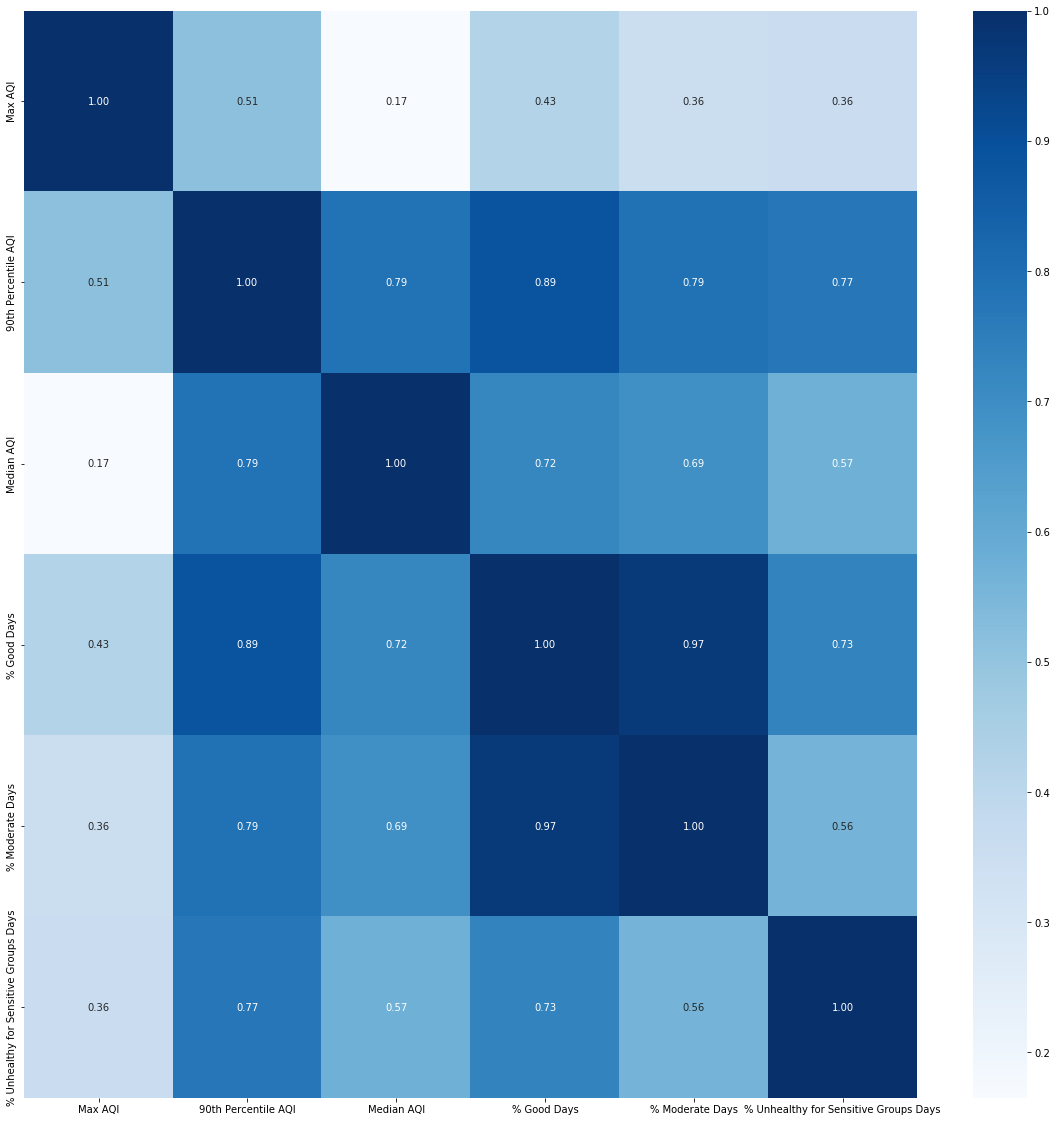

In [111]:
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(aqi.iloc[:,0:6].corr()),annot=True, fmt=".2f",cmap='Blues');

In [112]:
demo = pd.read_csv('model_data_V1.csv')
demo

,"# Total Population, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,"% Educational Attainment | Bachelor's degree or higher, 2021 [Estimated]","Population Density (per square mile), 2021 [Estimated]","% Household Size | 1-person household, 2021 [Estimated]","% Household Size | 2-person household, 2021 [Estimated]","% Household Size | 3-person household, 2021 [Estimated]","% Household Size | 4-person household, 2021 [Estimated]","% Household Size | 5-person household, 2021 [Estimated]","% Household Size | 6-person household, 2021 [Estimated]","# Gini Index Of Income Inequality [B19083] | Gini Index, 2019","% Hispanic or Latino | Hispanic or Latino, 2021 [Estimated]"
0,1.0,0.050829,0.063852,0.037397,0.030048,0.067894,0.101617,0.103699,0.123867,0.143505,...,0.172737,49.6310,0.322195,0.413428,0.090814,0.110925,0.037394,0.007437,0.4790,0.018942
1,1.0,0.071614,0.074231,0.042924,0.023425,0.059663,0.134038,0.118480,0.119038,0.126378,...,0.145731,95.7722,0.237690,0.321698,0.158837,0.143103,0.090112,0.032961,0.4791,0.034838
2,1.0,0.061614,0.058663,0.034343,0.015127,0.059493,0.106841,0.098693,0.112283,0.158370,...,0.194525,72.1216,0.290439,0.371741,0.157603,0.080609,0.050535,0.023844,0.4480,0.095448
3,1.0,0.063799,0.072117,0.044368,0.026192,0.061928,0.140647,0.137781,0.126969,0.119636,...,0.382892,452.3167,0.315286,0.346197,0.138452,0.109892,0.056727,0.019380,0.4615,0.086253
4,1.0,0.056856,0.063460,0.038478,0.014788,0.050251,0.110840,0.102513,0.113424,0.159081,...,0.179435,12.0786,0.306025,0.403252,0.120816,0.085751,0.031240,0.031878,0.4298,0.025742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,1.0,0.079274,0.076598,0.040247,0.022948,0.072546,0.157742,0.123716,0.102352,0.112664,...,0.150731,38.5523,0.214115,0.352553,0.144363,0.131406,0.090699,0.039721,0.4429,0.651439
3216,1.0,0.092389,0.060962,0.043165,0.022151,0.053578,0.135933,0.113593,0.095418,0.136691,...,0.225747,4.1977,0.214717,0.454041,0.097467,0.109771,0.069481,0.032569,0.4235,0.249068
3217,1.0,0.069376,0.068964,0.041087,0.028750,0.086206,0.137956,0.107015,0.100388,0.095645,...,0.123845,14.3798,0.231796,0.281321,0.117368,0.205789,0.070782,0.045907,0.5641,0.945810
3218,1.0,0.069609,0.086861,0.036911,0.014945,0.060481,0.119358,0.102006,0.123470,0.119057,...,0.098139,9.3194,0.124038,0.312611,0.211368,0.129070,0.136471,0.049438,0.4146,0.936978


In [113]:
str_to_remove = [' CITY COUNTY',' COUNTY',' PARISH',' MUNICIPIO',' MUNICIPALITY',' CENSUS AREA',' CITY AND BOROUGH',' BOROUGH']
for target in str_to_remove:
    demo['Name'] = demo['Name'].str.upper().str.replace(target,'')
demo['Name']

0       ABBEVILLE, SC
1          ACADIA, LA
2        ACCOMACK, VA
3             ADA, ID
4           ADAIR, IA
            ...      
3215         YUMA, AZ
3216         YUMA, CO
3217       ZAPATA, TX
3218       ZAVALA, TX
3219      ZIEBACH, SD
Name: Name, Length: 3220, dtype: object

In [114]:
aqi['County_State'] = aqi['County_State'].str.upper()
aqi['County_State']

0         BALDWIN, AL
1            CLAY, AL
2          DEKALB, AL
3          ELMORE, AL
4          ETOWAH, AL
            ...      
993      SUBLETTE, WY
994    SWEETWATER, WY
995         TETON, WY
996         UINTA, WY
997        WESTON, WY
Name: County_State, Length: 998, dtype: object

In [115]:
model_v2 = demo.merge(aqi,left_on='Name',right_on='County_State',how='left')
model_v2 = model_v2.drop(['County_State','Name'],axis=1)
model_v2

,"# Total Population, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,"% Household Size | 5-person household, 2021 [Estimated]","% Household Size | 6-person household, 2021 [Estimated]","# Gini Index Of Income Inequality [B19083] | Gini Index, 2019","% Hispanic or Latino | Hispanic or Latino, 2021 [Estimated]",Max AQI,90th Percentile AQI,Median AQI,% Good Days,% Moderate Days,% Unhealthy for Sensitive Groups Days
0,1.0,0.050829,0.063852,0.037397,0.030048,0.067894,0.101617,0.103699,0.123867,0.143505,...,0.037394,0.007437,0.4790,0.018942,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.071614,0.074231,0.042924,0.023425,0.059663,0.134038,0.118480,0.119038,0.126378,...,0.090112,0.032961,0.4791,0.034838,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.061614,0.058663,0.034343,0.015127,0.059493,0.106841,0.098693,0.112283,0.158370,...,0.050535,0.023844,0.4480,0.095448,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.063799,0.072117,0.044368,0.026192,0.061928,0.140647,0.137781,0.126969,0.119636,...,0.056727,0.019380,0.4615,0.086253,185.0,72.0,40.0,0.745902,0.204918,0.030055
4,1.0,0.056856,0.063460,0.038478,0.014788,0.050251,0.110840,0.102513,0.113424,0.159081,...,0.031240,0.031878,0.4298,0.025742,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,1.0,0.079274,0.076598,0.040247,0.022948,0.072546,0.157742,0.123716,0.102352,0.112664,...,0.090699,0.039721,0.4429,0.651439,321.0,69.0,44.0,0.702186,0.289617,0.005464
3216,1.0,0.092389,0.060962,0.043165,0.022151,0.053578,0.135933,0.113593,0.095418,0.136691,...,0.069481,0.032569,0.4235,0.249068,NaN,NaN,NaN,NaN,NaN,NaN
3217,1.0,0.069376,0.068964,0.041087,0.028750,0.086206,0.137956,0.107015,0.100388,0.095645,...,0.070782,0.045907,0.5641,0.945810,NaN,NaN,NaN,NaN,NaN,NaN
3218,1.0,0.069609,0.086861,0.036911,0.014945,0.060481,0.119358,0.102006,0.123470,0.119057,...,0.136471,0.049438,0.4146,0.936978,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
for c in model_v2.columns:
    model_v2[c].fillna(value=model_v2[c].median(), inplace=True)
model_v2

,"# Total Population, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,"% Household Size | 5-person household, 2021 [Estimated]","% Household Size | 6-person household, 2021 [Estimated]","# Gini Index Of Income Inequality [B19083] | Gini Index, 2019","% Hispanic or Latino | Hispanic or Latino, 2021 [Estimated]",Max AQI,90th Percentile AQI,Median AQI,% Good Days,% Moderate Days,% Unhealthy for Sensitive Groups Days
0,1.0,0.050829,0.063852,0.037397,0.030048,0.067894,0.101617,0.103699,0.123867,0.143505,...,0.037394,0.007437,0.4790,0.018942,101.0,51.0,36.0,0.897760,0.099066,0.000000
1,1.0,0.071614,0.074231,0.042924,0.023425,0.059663,0.134038,0.118480,0.119038,0.126378,...,0.090112,0.032961,0.4791,0.034838,101.0,51.0,36.0,0.897760,0.099066,0.000000
2,1.0,0.061614,0.058663,0.034343,0.015127,0.059493,0.106841,0.098693,0.112283,0.158370,...,0.050535,0.023844,0.4480,0.095448,101.0,51.0,36.0,0.897760,0.099066,0.000000
3,1.0,0.063799,0.072117,0.044368,0.026192,0.061928,0.140647,0.137781,0.126969,0.119636,...,0.056727,0.019380,0.4615,0.086253,185.0,72.0,40.0,0.745902,0.204918,0.030055
4,1.0,0.056856,0.063460,0.038478,0.014788,0.050251,0.110840,0.102513,0.113424,0.159081,...,0.031240,0.031878,0.4298,0.025742,101.0,51.0,36.0,0.897760,0.099066,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,1.0,0.079274,0.076598,0.040247,0.022948,0.072546,0.157742,0.123716,0.102352,0.112664,...,0.090699,0.039721,0.4429,0.651439,321.0,69.0,44.0,0.702186,0.289617,0.005464
3216,1.0,0.092389,0.060962,0.043165,0.022151,0.053578,0.135933,0.113593,0.095418,0.136691,...,0.069481,0.032569,0.4235,0.249068,101.0,51.0,36.0,0.897760,0.099066,0.000000
3217,1.0,0.069376,0.068964,0.041087,0.028750,0.086206,0.137956,0.107015,0.100388,0.095645,...,0.070782,0.045907,0.5641,0.945810,101.0,51.0,36.0,0.897760,0.099066,0.000000
3218,1.0,0.069609,0.086861,0.036911,0.014945,0.060481,0.119358,0.102006,0.123470,0.119057,...,0.136471,0.049438,0.4146,0.936978,101.0,51.0,36.0,0.897760,0.099066,0.000000


In [117]:
model_v2.to_csv('model_v2.csv',index=False)